In [1]:
#!pip install hmmlearn

from hmmlearn import hmm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [3]:
df = pd.read_csv(r"SPY.csv", index_col=0, parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [4]:
returns = np.log(df['Close']).diff()

returns.dropna(inplace=True)

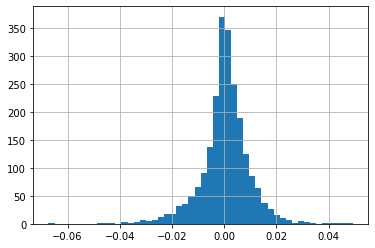

In [5]:
returns.hist(bins=50)

In [6]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [7]:
X = returns.to_numpy().reshape(-1, 1)
model.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, implementation='log', init_params='stmc',
            means_prior=0, means_weight=0, min_covar=0.001, n_components=2,
            n_iter=10, params='stmc', random_state=None, startprob_prior=1.0,
            tol=0.01, transmat_prior=1.0, verbose=False)

In [8]:
Z = model.predict(X)
Z # states, clusters

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

C:\Users\AButa\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


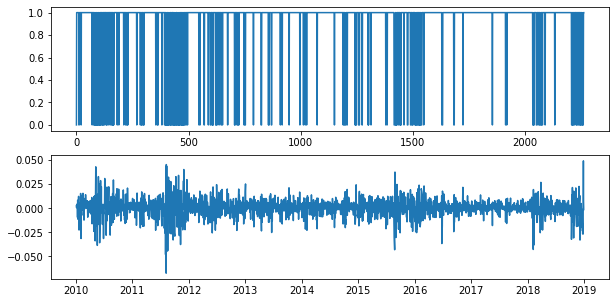

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211) # 2 by 1 grid, z in 1st position
plt.plot(Z)
plt.subplot(212)
plt.plot(returns)

# with large return values --> thicker lines on Z, sparse otherwise
# encouraging result --> model can tell difference between 2 regimes

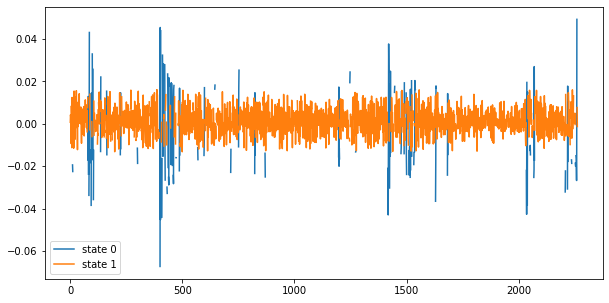

In [10]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend()

# from what we see, blue values are larger --> low volatility
# opposite for orange

In [11]:
# transition matrix
model.transmat_

# longest runs we see is when the stock returns stay in the low volatility state (state 1 to state 1, 76%)
# high value returns belongs to high state...

array([[0.38477227, 0.61522773],
       [0.23767303, 0.76232697]])

In [12]:
# try to set the transition matrix intuitively
model.transmat_ = np.array([
    [0.9999, 0.0001],
    [0.001, 0.999]
])

In [13]:
# run inference again
Z = model.predict(X)

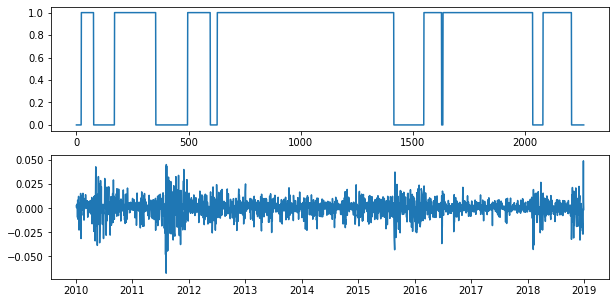

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211) # 2 by 1 grid, z in 1st position
plt.plot(Z)
plt.subplot(212)
plt.plot(returns)

# very few transitions between states, model prefers for the state to remain the same
# Z is just as valid with states reversed, switching between states is more improbable, 
# sequence of state more stable and plausible

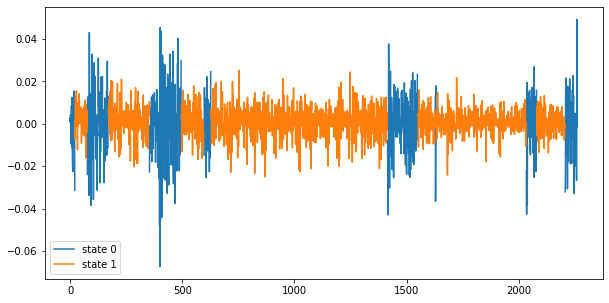

In [15]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend()

# looks better, confirms states are more stable